In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv") 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
#Not sure if I should seperate dicrete and continous count, does age need normalising???
count = ['age', 'bmi', 'children', 'charges']
categorical = ['sex', 'smoker', 'region']

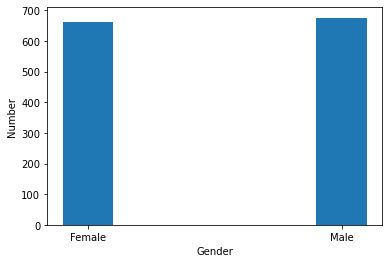

In [6]:
plt.bar(["Female","Male"],[len(df[df["sex"]=="female"]),len(df[df["sex"]=="male"])],width=0.2)
plt.xlabel("Gender")
plt.ylabel("Number")

plt.show()

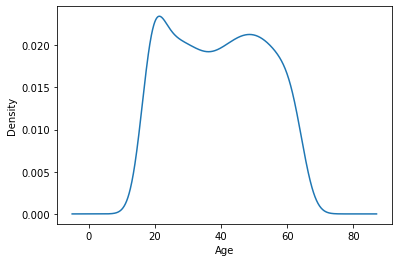

In [7]:
df["age"].plot.density()

plt.xlabel("Age")
plt.show()

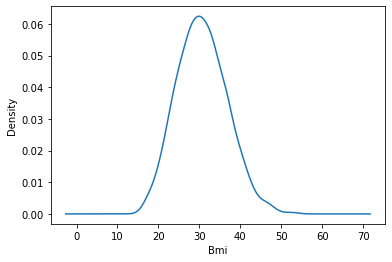

In [8]:
df["bmi"].plot.density()

plt.xlabel("Bmi")
plt.show()

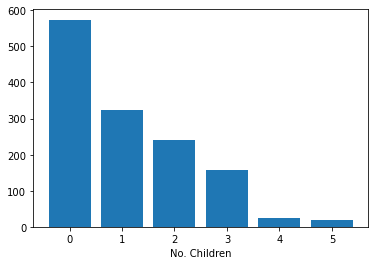

In [36]:
plt.bar(x=list(map(str, set(df["children"]))),height=df["children"].value_counts()) #.plot.density()

plt.xlabel("No. Children")

plt.show()

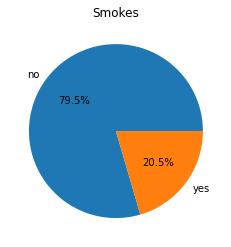

In [24]:
plt.pie(df["smoker"].value_counts(),labels = ["no","yes"], autopct='%1.1f%%')

plt.title("Smokes")
plt.show()

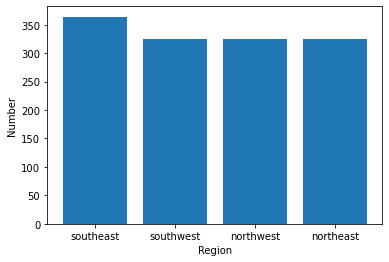

In [11]:
plt.bar(["southeast","southwest","northwest","northeast"],df["region"].value_counts())
plt.xlabel("Region")
plt.ylabel("Number")

plt.show()

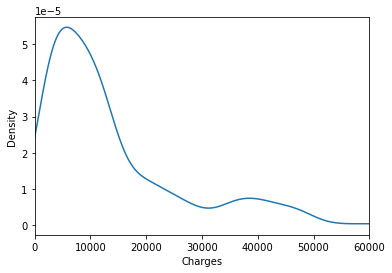

In [20]:
df["charges"].plot.density()

plt.xlabel("Charges")
plt.xlim(0,60000)
plt.show()

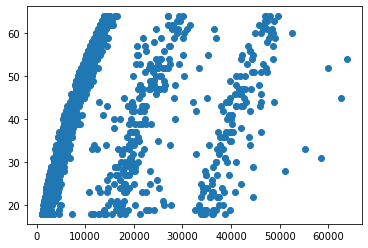

There seems to be 3 significantly spaced apart bands, or clusters that show up when seperating by age. For each cluster
The charge seems to be higher by age.


In [43]:
plt.scatter(df["charges"],df["age"])

plt.show()
print("""There seems to be 3 significantly spaced apart bands, or clusters that show up when seperating by age. For each cluster
The charge seems to be higher by age.""")

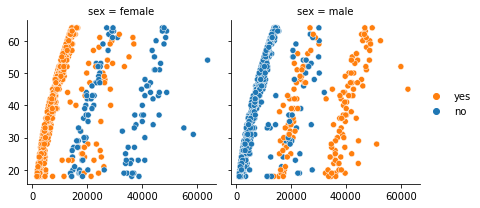

In [42]:
g = sns.FacetGrid(df, col="sex")
g.map_dataframe(sns.scatterplot, x="charges", y="age", hue="smoker")
g.add_legend()

plt.show()

We see that several of these variables are discrete categorical variables, and are strings. A machine learning alghroithm
can't understand string variables, so we will have to use a technique called one hot encoding to convert the feature into
several binary features

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#The make_column_transformer is to choose specific columns to encode, rather than the whole dataset at once

transformer = make_column_transformer(
    (OneHotEncoder(), categorical),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_no,onehotencoder__x1_yes,onehotencoder__x2_northeast,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [15]:
#Normalising
print(f"""Another issue we see is that the count variables have differing magnitudes, for example children has a mean of {round(df["children"].mean(),1)} while bmi 
has a mean of {round(df["bmi"].mean(),1)}. A machine learning algorithm will?? give higher importance to features with larger values (ref),
so to counter this we will have to standardise the count features""".format())

print("""
I'll use the standard scaler for this, which uses the equation scaled_x=(x-mean)/standard_deviation. This keeps the distribution of the
variables, but centre's them at 0, and scales them down. (ref for this, and for why standard is best)
""")

Another issue we see is that the count variables have differing magnitudes, for example children has a mean of 1.1 while bmi 
has a mean of 30.7. A machine learning algorithm will?? give higher importance to features with larger values (ref),
so to counter this we will have to standardise the count features

I'll use the standard scaler for this, which uses the equation scaled_x=(x-mean)/standard_deviation. This keeps the distribution of the
variables, but centre's them at 0, and scales them down. (ref for this, and for why standard is best)



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

transformed_df[count] = scaler.fit_transform(transformed_df[count])
transformed_df.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_no,onehotencoder__x1_yes,onehotencoder__x2_northeast,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.438764,-0.453320,-0.908614,0.298584
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.509965,0.509621,-0.078767,-0.953689
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.797954,0.383307,1.580926,-0.728675
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.441948,-1.305531,-0.908614,0.719843
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.513149,-0.292556,-0.908614,-0.776802


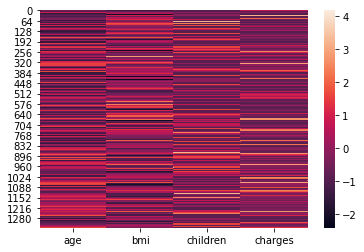

In [21]:
sns.heatmap(transformed_df[count])
plt.show()